# Author Nick Sebasco
## Date: 10/18/2021

Image Size Analysis Report:
Hey there, I have a spreadsheet that lists all of our image uploads to 12ax7. 
I’d like to find out if the average upload size has increased or decreased over 
time. Also, is there a point where the average upload size significantly increased 
or decreased?

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

            SIZE (in kB) 
DATE                     
2021-06-17        4988.73
2021-06-17        1187.32
2021-06-17        1167.23
2021-06-17        1110.72
2021-06-17        1055.80
2021-06-17        1028.70
2021-06-17         887.53
2021-06-17         792.57
2021-06-17         732.79
2021-06-17         730.25
            SIZE (in kB) 
DATE                     
2021-06-17            NaN
2021-06-17            NaN
2021-06-17            NaN
2021-06-17            NaN
2021-06-17            NaN
2021-06-17            NaN
2021-06-17            NaN
2021-06-17            NaN
2021-06-17            NaN
2021-06-17            NaN


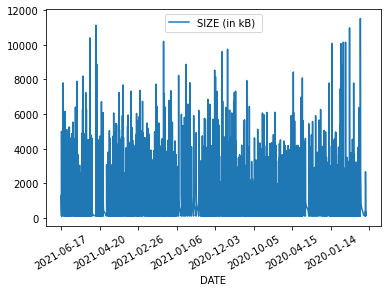

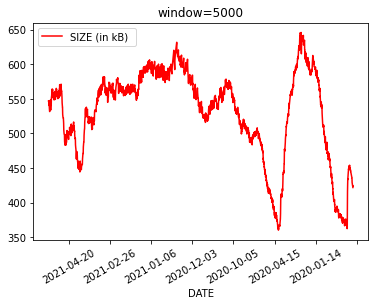

In [84]:
D = pd.read_csv('data/imageToUpload.tsv', sep='\t', header=0)
D.set_index('DATE', inplace=True, drop=False)
# print("columns:",D.columns)
# print(D.head(20),"\n")

# (1) Extract salient info
size = D[['SIZE (in kB) ']]
size = size.loc[size['SIZE (in kB) ']>100]

# (2) Compute & remove outliers
z = np.abs(stats.zscore(size))
size = size[(z < 4).all(axis=1)]

w = 5000
print(size.head(10))
rolling = size.rolling(window=w)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

size.plot()
plt.xticks(rotation=30)
rolling_mean.plot(color='red')
plt.title(f'window={w}')
plt.xticks(rotation=30)
plt.show()



In [85]:
df2 = size.iloc[size.shape[0]//2:, :]
df1 = size.iloc[:size.shape[0]//2, :]

print(df2)

if False:
    print("Size Total:")
    print(size.shape,df1.shape)
    print(size.describe())
    print(size.median())

if False:
    print("1st half Total:")
    print(df1.shape)
    print(df1.describe())
    print(df1.median())

if False:
    print("2nd half Total:")
    print(df2.shape)
    print(df2.describe())
    print(df2.median())


            SIZE (in kB) 
DATE                     
2020-12-06         416.61
2020-12-06         412.78
2020-12-06         411.65
2020-12-06         411.62
2020-12-06         396.30
...                   ...
2018-06-12         329.30
2018-06-12         329.30
2018-06-12         202.80
2018-06-12         164.86
2018-06-12         163.52

[39539 rows x 1 columns]


In [89]:
if False:
    # Building a Moving Averages Model to predict the future
    window = 1000
    forecast_days = 30
    lst = list(size.values[0:window])
    for i in range(forecast_days):
        print("ma = ", np.mean(lst[i:i+window]))

ma =  493.22635
ma =  488.72634634634636
ma =  488.0263527054109
ma =  487.34510531594793
ma =  486.7192269076305
ma =  486.14728643216085
ma =  485.60145875251504
ma =  485.19669687814695
ma =  484.8868447580645
ma =  484.63669021190714
ma =  484.38859595959593
ma =  484.149403437816
ma =  483.92783400809725
ma =  483.7068996960486
ma =  483.48910750507093
ma =  483.281421319797
ma =  483.12097560975604
ma =  482.98721261444564
ma =  482.8534215885947
ma =  482.73506625891946
ma =  482.6194081632653
ma =  482.5064964249234
ma =  482.43168711656443
ma =  482.36240532241555
ma =  482.3054713114754
ma =  482.25331282051286
ma =  482.220636550308
ma =  482.2017471736896
ma =  482.19543209876537
ma =  482.19478887744594


In [124]:
from fbprophet import Prophet
model = Prophet()
# fit the model
sz = size.copy()
sz = sz.reset_index()
# Dataframe must have columns 'ds' and 'y'
sz = sz.rename(columns={'DATE':'ds','SIZE (in kB) ':'y'})
sz['ds'] = pd.to_datetime(sz['ds'])
model.fit(sz)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


              ds        y
0     2021-06-17  4988.73
1     2021-06-17  1187.32
2     2021-06-17  1167.23
3     2021-06-17  1110.72
4     2021-06-17  1055.80
...          ...      ...
79073 2018-06-12   329.30
79074 2018-06-12   329.30
79075 2018-06-12   202.80
79076 2018-06-12   164.86
79077 2018-06-12   163.52

[79078 rows x 2 columns]
              0
0    2021-07-01
1    2021-07-02
2    2021-07-03
3    2021-07-04
4    2021-07-05
..          ...
169  2021-12-25
170  2021-12-26
171  2021-12-27
172  2021-12-28
173  2021-12-29

[174 rows x 1 columns]


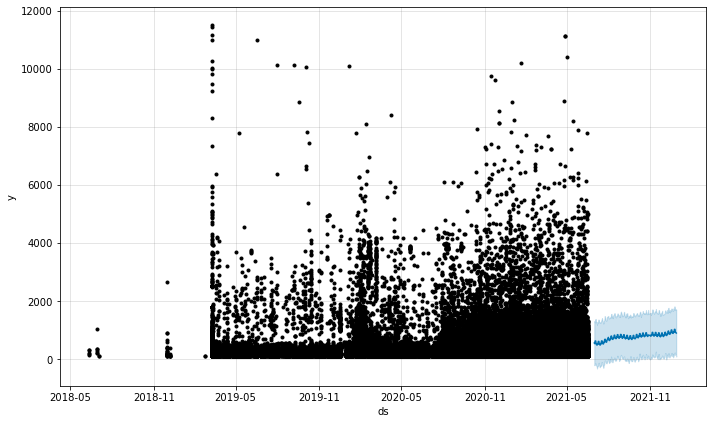

In [128]:
future = []
for m in range(7,13):
	for i in range(1, 30):
		date = '2021-%02d-%02d' % (m,i)
		future.append([date])

future = pd.DataFrame(future)
print(sz)
print(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
# plot forecast
model.plot(forecast)
plt.show()
forecast.to_csv('PredictOutput.csv')
